In [2]:
import numpy as np
import pandas, os, astropy, scipy, math
import matplotlib.pyplot as plt
import sklearn
from photutils.aperture import CircularAperture, SkyCircularAperture, aperture_photometry, EllipticalAperture, SkyEllipticalAperture
from astropy.coordinates import SkyCoord
import astropy.units as u
from astropy.wcs import WCS
from astropy.visualization import simple_norm
from astropy.wcs.utils import pixel_to_skycoord
import astropy.io.fits as fits
from reproject import reproject_interp
import img_scale
from mpl_toolkits.axes_grid1 import Divider, Size
from astropy.cosmology import FlatLambdaCDM 
from astropy.wcs.utils import proj_plane_pixel_scales

# Finding the NSC for SMDG1048131+115807(ID = 0)

In [3]:
galcenx0 = 2183.5457595291505
galceny0 = 3244.685526523298
cut_cat0 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/0_SMDG1048131+115807_cut_catalog.csv')


In [4]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal0 = cut_cat0['xc'].to_numpy()
ycgal0 = cut_cat0['yc'].to_numpy()
f606mag0 = cut_cat0['F606W_mag_vega'].to_numpy()
f814mag0 = cut_cat0['F814W_mag_vega'].to_numpy()


In [5]:
#calculating the distance from the centre of the galaxy for each bright object
distgal0 = np.sqrt((xcgal0 - galcenx0)**2 + (ycgal0 - galceny0)**2)


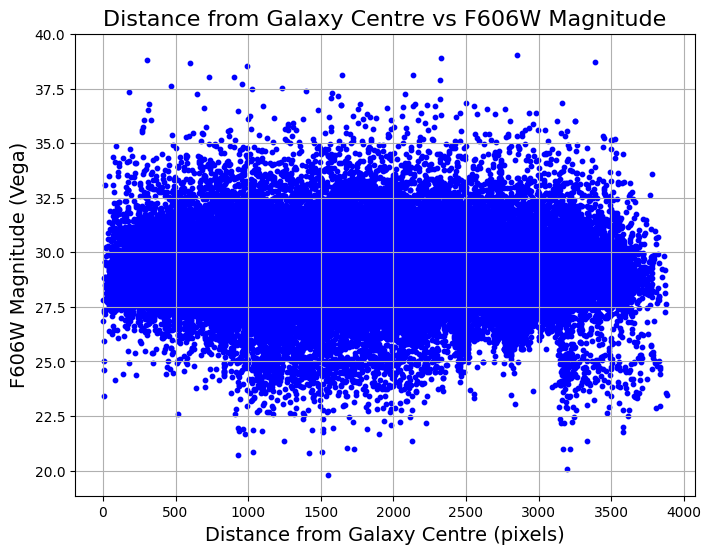

In [6]:
#plotting distance vs magnitude for F606W filter
plt.figure(figsize=(8,6))
plt.scatter(distgal0, f606mag0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

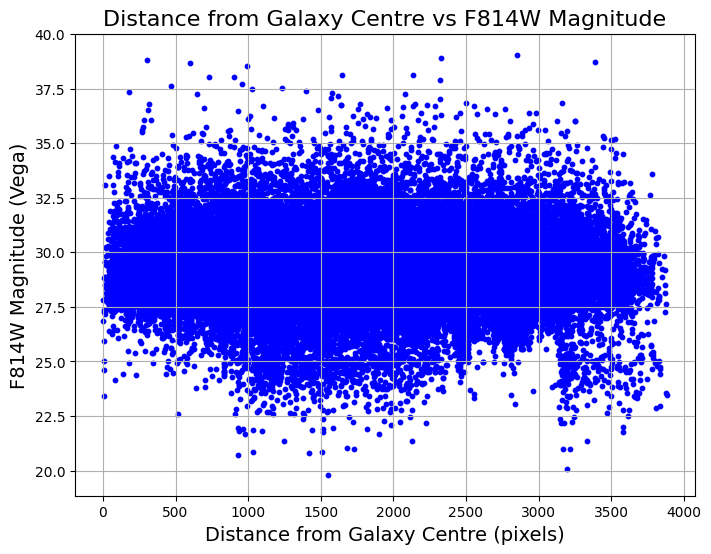

In [7]:
#plotting the distance vs magnitude for F814W filter
plt.figure(figsize=(8,6))
plt.scatter(distgal0, f606mag0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

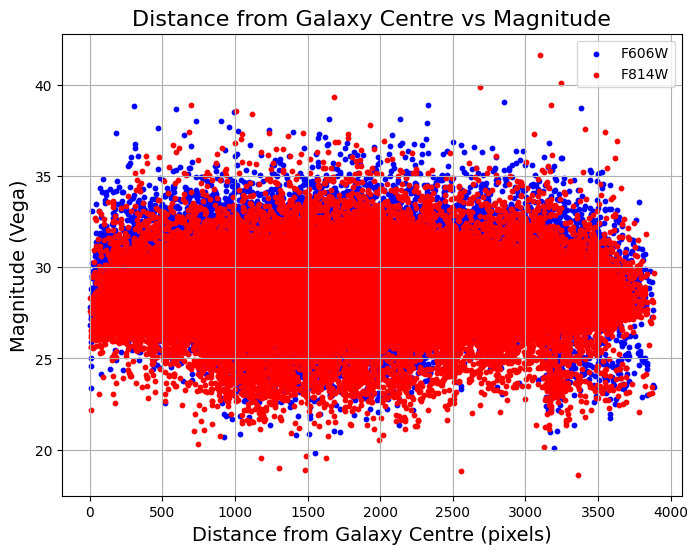

In [8]:
#plotting distance vs magnitude for both filters together
plt.figure(figsize=(8,6))
plt.scatter(distgal0, f606mag0, color='blue', s=10, label='F606W')
plt.scatter(distgal0, f814mag0, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [9]:
# converting pixel in re(arcsec) to pixels
re_arcsec0 = 9.31

hdul0 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_0_F814/MAST_2025-11-09T22_49_51.321Z/HST/jd5h07020_drc.fits')
if len(hdul0) > 1:
    hdr0 = hdul0[1].header
else:
    hdr0 = hdul0[0].header
wcs0 = WCS(hdr0)
pixel_scale_degrees0 = proj_plane_pixel_scales(wcs0)
scale_arcsec_per_pixel0 = pixel_scale_degrees0[0] * 3600
scale_pixel_per_arcsec0 = 1 / scale_arcsec_per_pixel0
re_pixels0 = re_arcsec0 * scale_pixel_per_arcsec0
print(re_pixels0)

186.2000000000001


In [10]:
#refining the bright object list to only include objects within re and finding the colour of the objects
distgal_re0 = distgal0[distgal0 <= re_pixels0]
f606mag_re0 = f606mag0[distgal0 <= re_pixels0]
f814mag_re0 = f814mag0[distgal0 <= re_pixels0]
color0 = f606mag_re0 - f814mag_re0 

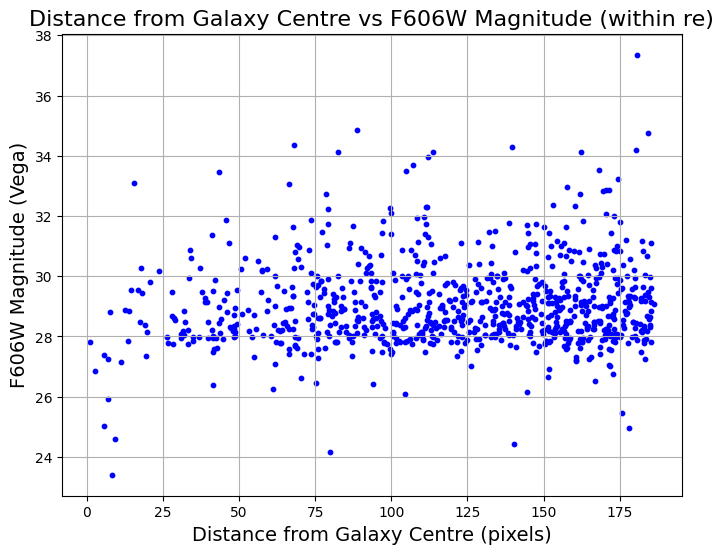

In [11]:
#plotting distance vs magnitude for f606w in re 
plt.figure(figsize=(8,6))
plt.scatter(distgal_re0, f606mag_re0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

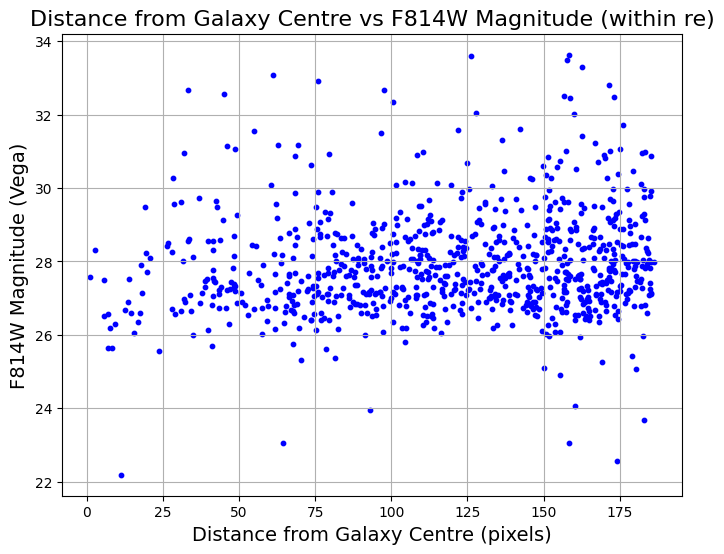

In [12]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re0, f814mag_re0, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

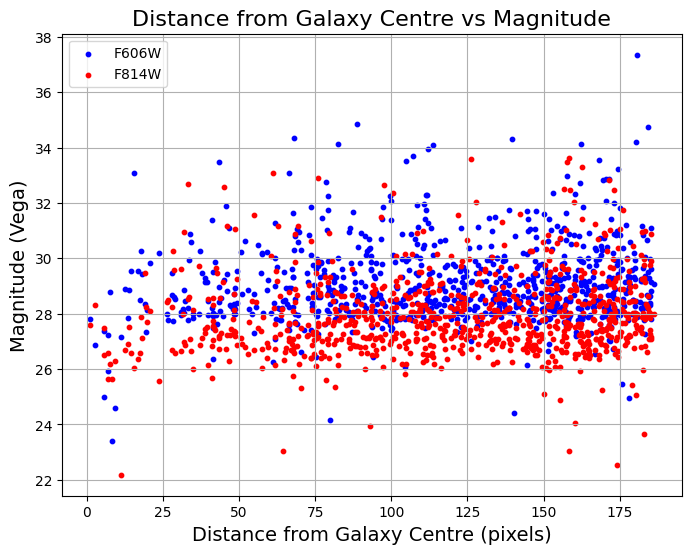

In [13]:
#plotting distance vs magnitude for the objects within re for both filters together
plt.figure(figsize=(8,6))
plt.scatter(distgal_re0, f606mag_re0, color='blue', s=10, label='F606W')
plt.scatter(distgal_re0, f814mag_re0, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

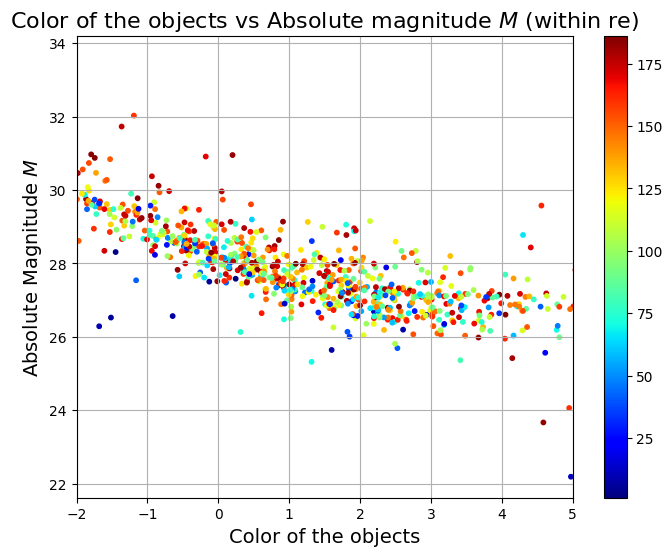

In [ ]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color0, f814mag_re0, c = distgal_re0,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [124]:
#Converting into absolute Mag
distgalpc0 = 11.1 * 1e6
absmag_re0 = f814mag_re0 - 5*np.log10(distgalpc0/10)

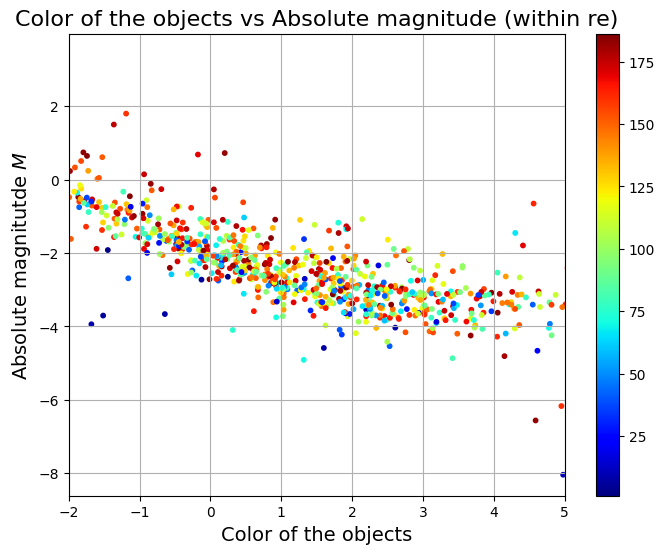

In [123]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color0, absmag_re0, c = distgal_re0,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

# Finding NSC for SMDG0239126-080826(ID = 3)

In [15]:
galcenx3_l = 1254.3993890460833
galceny3_l = 1678.3210825168053
galcenx3_r = 2956.030359976996
galceny3_r = 2537.341111141835 
cut_cat3 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/3_SMDG0239126-080826_cut_catalog.csv')

In [16]:
# converting re(arcsec) to pixels
re_arcsec3 = 11.72

hdul3 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_3_F814/MAST_2025-11-09T23_10_48.561Z/HST/jdz504020_drc.fits')
if len(hdul3) > 1:
    hdr3 = hdul3[1].header
else:
    hdr3 = hdul3[0].header
wcs3 = WCS(hdr3)
pixel_scale_degrees3 = proj_plane_pixel_scales(wcs3)
scale_arcsec_per_pixel3 = pixel_scale_degrees3[0] * 3600
scale_pixel_per_arcsec3 = 1 / scale_arcsec_per_pixel3
re_pixels3 = re_arcsec3 * scale_pixel_per_arcsec3
print(re_pixels3)

234.40000000000427


In [17]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal3 = cut_cat3['xc'].to_numpy()
ycgal3 = cut_cat3['yc'].to_numpy()
f606mag3 = cut_cat3['F606W_mag_vega'].to_numpy()
f814mag3 = cut_cat3['F814W_mag_vega'].to_numpy()


In [18]:
#calculating the distance from the centre of the galaxy for each bright object
distgal3_l = np.sqrt((xcgal3 - galcenx3_l)**2 + (ycgal3 - galceny3_l)**2)
distgal3_r = np.sqrt((xcgal3 - galcenx3_r)**2 + (ycgal3 - galceny3_r)**2)


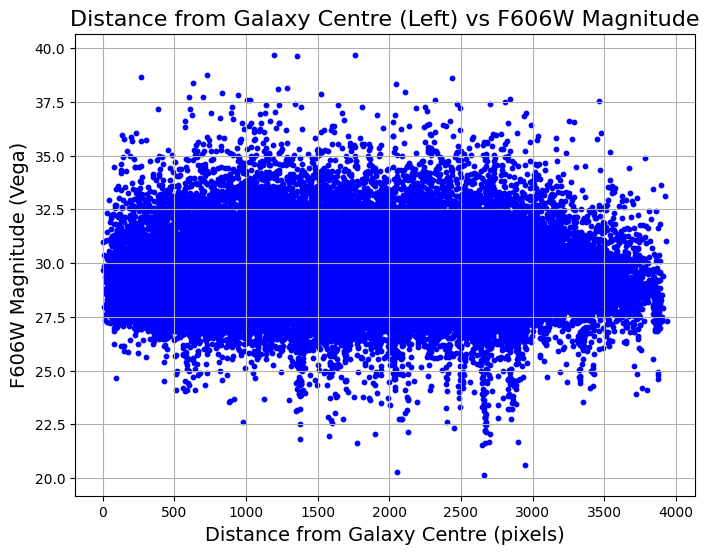

In [19]:
#Potting distance vs magnitude for F606W filter for the left centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_l, f606mag3, color='blue', s=10)
plt.title('Distance from Galaxy Centre (Left) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

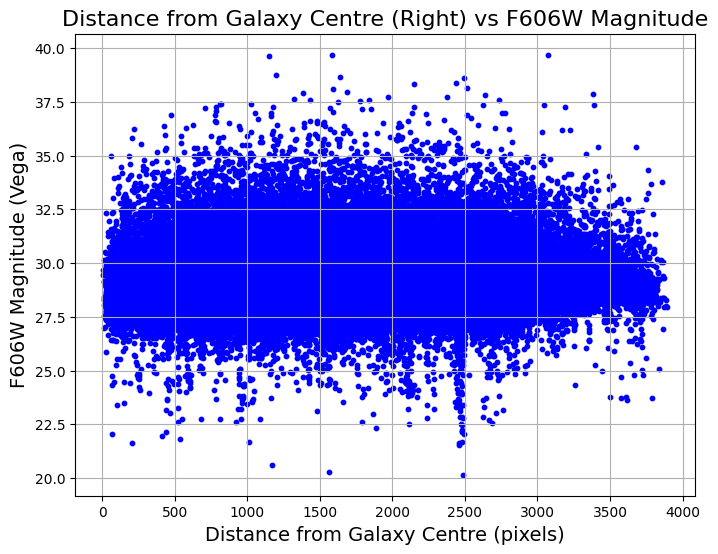

In [20]:
#plotting distance vs magnitude for f606W filter for the right centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_r, f606mag3, color='blue', s=10    )
plt.title('Distance from Galaxy Centre (Right) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

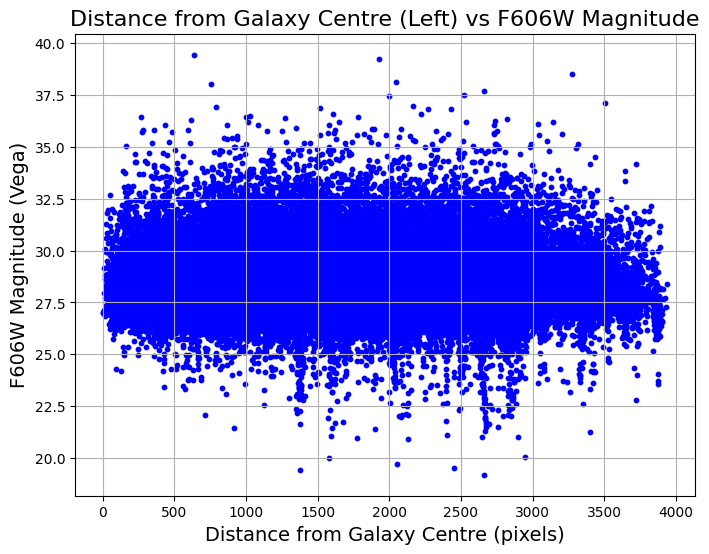

In [21]:
#plotting distance vs magnitude for f814W filter for the left centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_l, f814mag3, color='blue', s=10)
plt.title('Distance from Galaxy Centre (Left) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

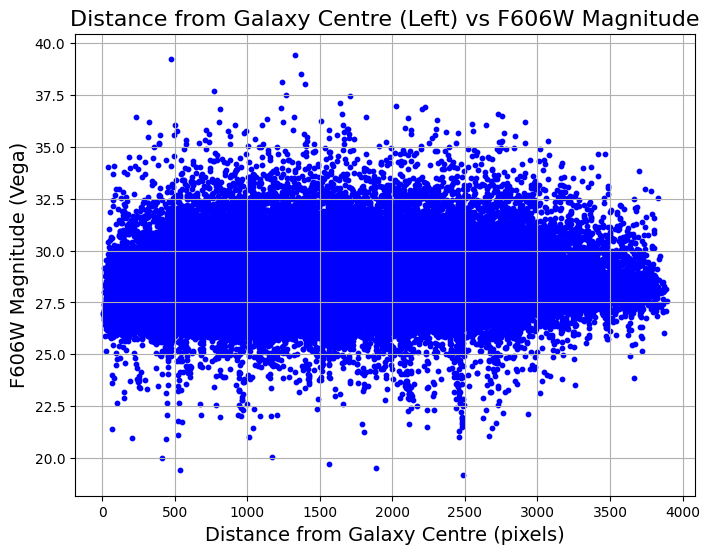

In [22]:
#plotting distance vs magnitude for f814W filter for the right centre
plt.figure(figsize=(8,6))
plt.scatter(distgal3_r, f814mag3, color='blue', s=10)
plt.title('Distance from Galaxy Centre (Left) vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

/Users/ananthmugundhan/Documents/Research_work/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


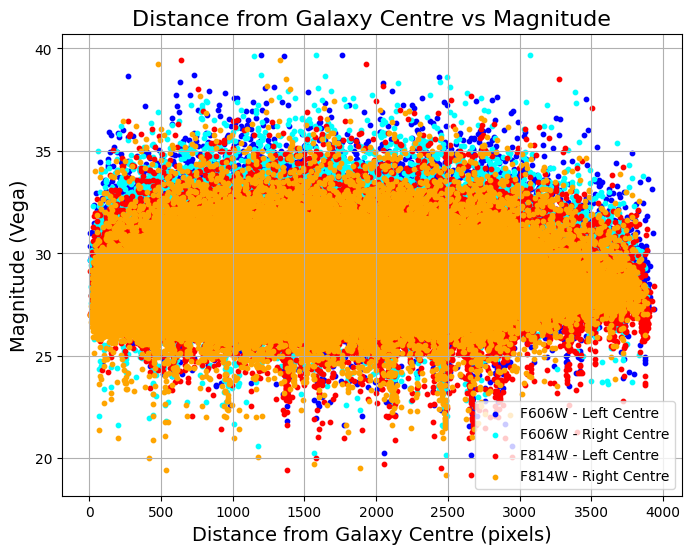

In [23]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal3_l, f606mag3, color='blue', s=10, label='F606W - Left Centre')
plt.scatter(distgal3_r, f606mag3, color='cyan', s=10, label='F606W - Right Centre')
plt.scatter(distgal3_l, f814mag3, color='red', s=10, label='F814W - Left Centre')
plt.scatter(distgal3_r, f814mag3, color='orange', s=10, label='F814W - Right Centre')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [89]:
# refining the bright object list to only include objects within re and finding the color of the objects
distgal_re3_l = distgal3_l[distgal3_l <= re_pixels3]
f606mag_re3_l = f606mag3[distgal3_l <= re_pixels3]
f814mag_re3_l = f814mag3[distgal3_l <= re_pixels3]  
distgal_re3_r = distgal3_r[distgal3_r <= re_pixels3]
f606mag_re3_r = f606mag3[distgal3_r <= re_pixels3]
f814mag_re3_r = f814mag3[distgal3_r <= re_pixels3]
color3_l = f606mag_re3_l - f814mag_re3_l 
color3_r = f606mag_re3_r - f814mag_re3_r 

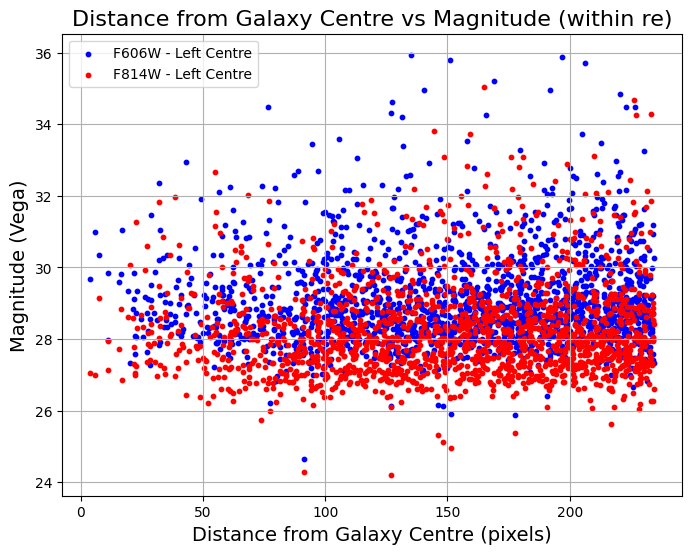

In [25]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re3_l, f606mag_re3_l, color='blue', s=10, label='F606W - Left Centre')
plt.scatter(distgal_re3_l, f814mag_re3_l, color='red', s=10, label='F814W - Left Centre')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()  

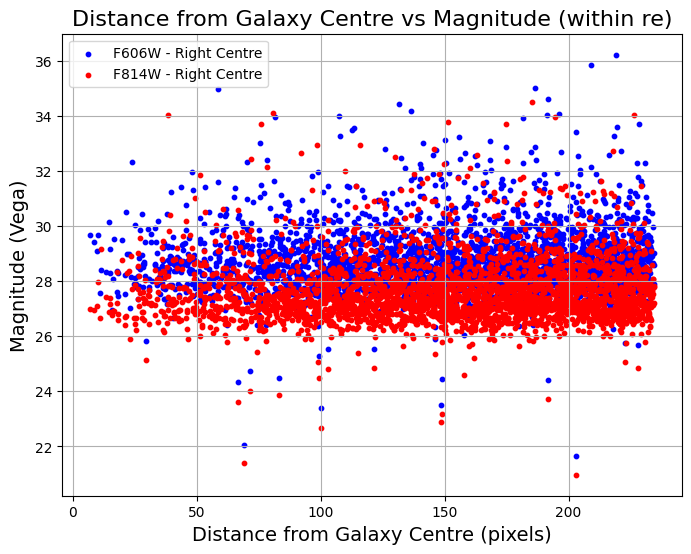

In [26]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re3_r, f606mag_re3_r, color='blue', s=10, label='F606W - Right Centre')
plt.scatter(distgal_re3_r, f814mag_re3_r, color='red', s=10, label='F814W - Right Centre')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()  

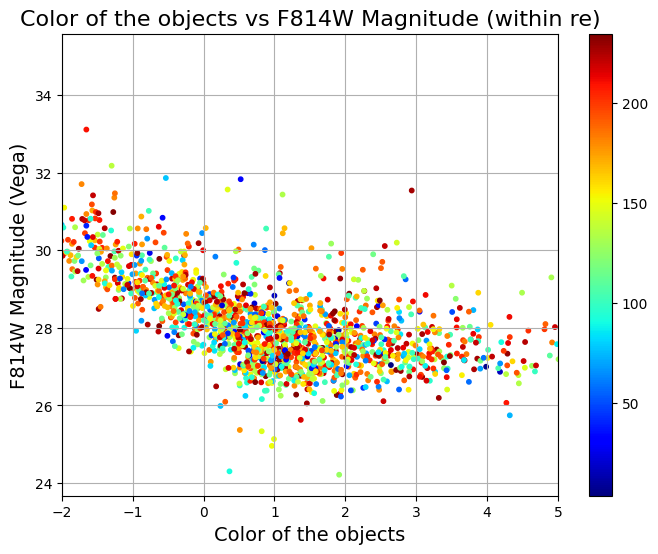

In [104]:
#plotting a color vs magnitude for the objects within a re for left centre
plt.figure(figsize=(8,6))
plt.scatter(color3_l, f814mag_re3_l, c = distgal_re3_l,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


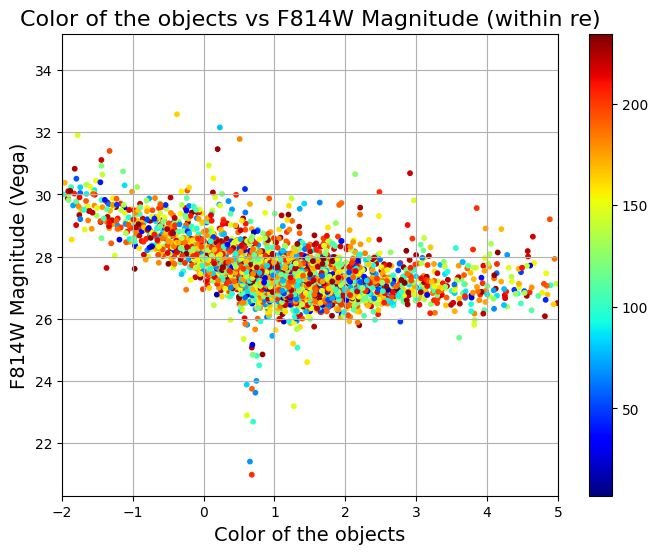

In [105]:
#plotting a color vs magnitude for the objects within a re for right centre
plt.figure(figsize=(8,6))
plt.scatter(color3_r, f814mag_re3_r, c = distgal_re3_r,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [125]:
#Converting into absolute Mag

# Finding NSC for SMDG1215513+473253(ID = 25)

In [29]:
galcenx25 = 3347.565661931523
galceny25 = 3343.9503901226444
cut_cat25 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/25_SMDG1215513+473253_cut_catalog.csv')

In [30]:
#converting re(arcsec) to pixels
re_arcsec25 = 10.34

hdul25 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_25_F606/MAST_2025-11-10T20_44_12.230Z/HST/jd5h21010_drc.fits')
if len(hdul25) > 1:
    hdr25 = hdul25[1].header
else:
    hdr25 = hdul25[0].header
wcs25 = WCS(hdr25)
pixel_scale_degrees25 = proj_plane_pixel_scales(wcs25)
scale_arcsec_per_pixel25 = pixel_scale_degrees25[0] * 3600
scale_pixel_per_arcsec25 = 1 / scale_arcsec_per_pixel25
re_pixels25 = re_arcsec25 * scale_pixel_per_arcsec25
print(re_pixels25)

206.80000000000132


In [31]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal25 = cut_cat25['xc'].to_numpy()
ycgal25 = cut_cat25['yc'].to_numpy()
f606mag25 = cut_cat25['F606W_mag_vega'].to_numpy()
f814mag25 = cut_cat25['F814W_mag_vega'].to_numpy()

In [32]:
#calculating the distance from the centre of the galaxy for each bright object
distgal25 = np.sqrt((xcgal25 - galcenx25)**2 + (ycgal25 - galceny25)**2)

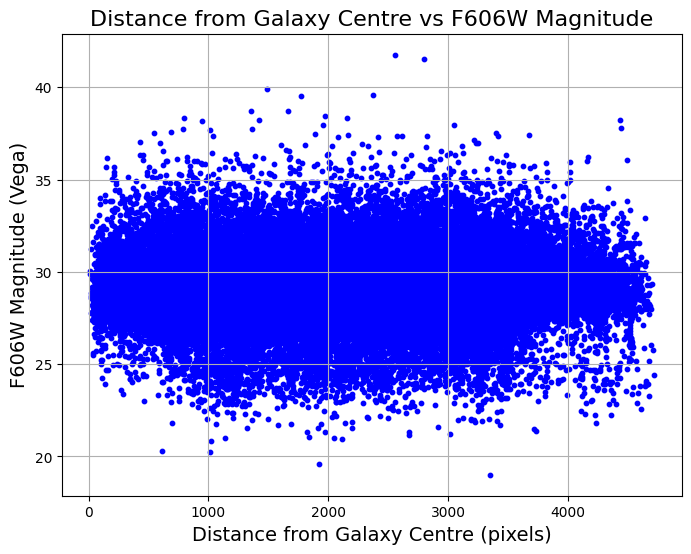

In [33]:
#plotting distance vs magnitude for f606w
plt.figure(figsize=(8,6))
plt.scatter(distgal25, f606mag25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

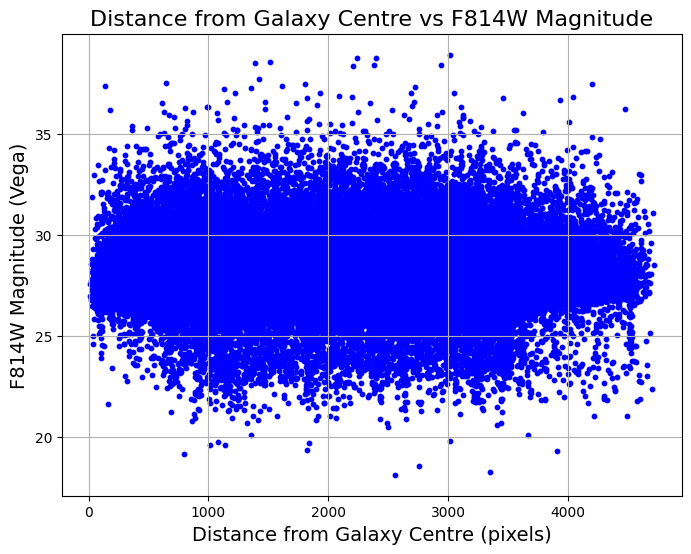

In [34]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal25, f814mag25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show() 

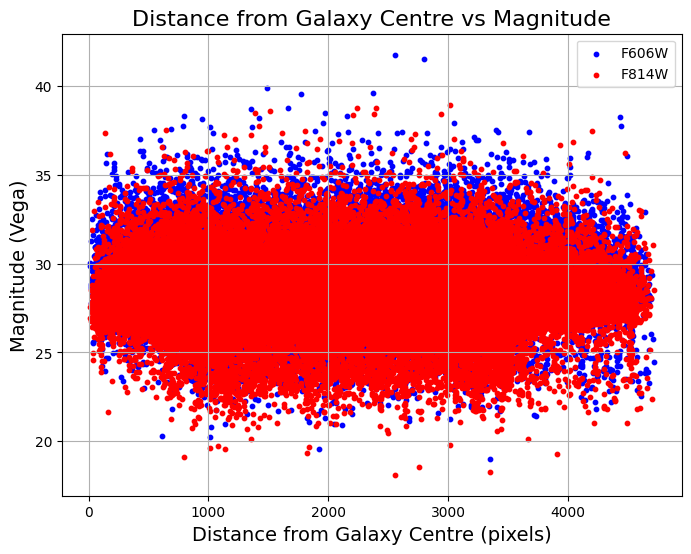

In [35]:
#plotting distance vs magnitude for both filters together
plt.figure(figsize=(8,6))
plt.scatter(distgal25, f606mag25, color='blue', s=10, label='F606W')
plt.scatter(distgal25, f814mag25, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [93]:
#refining the bright object list to only include objects within re
distgal_re25 = distgal25[distgal25 <= re_pixels25]
f606mag_re25 = f606mag25[distgal25 <= re_pixels25]
f814mag_re25 = f814mag25[distgal25 <= re_pixels25]
color25 = f606mag_re25 - f814mag_re25

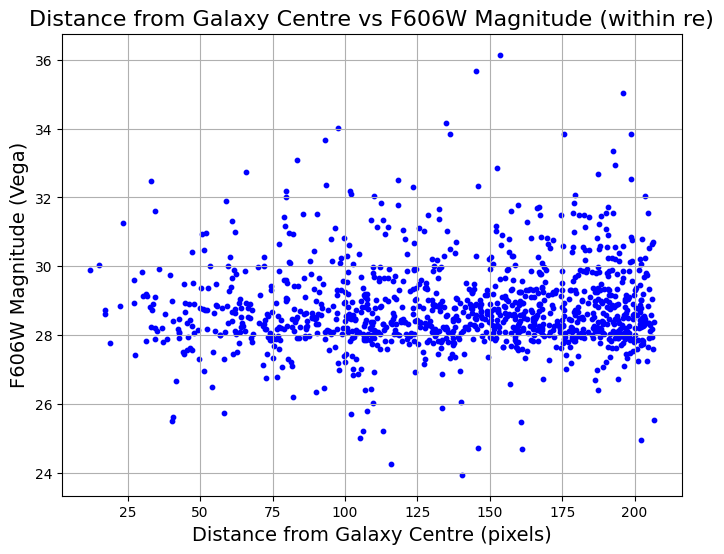

In [37]:
#plotting distance vs magnitude for f606w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re25, f606mag_re25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

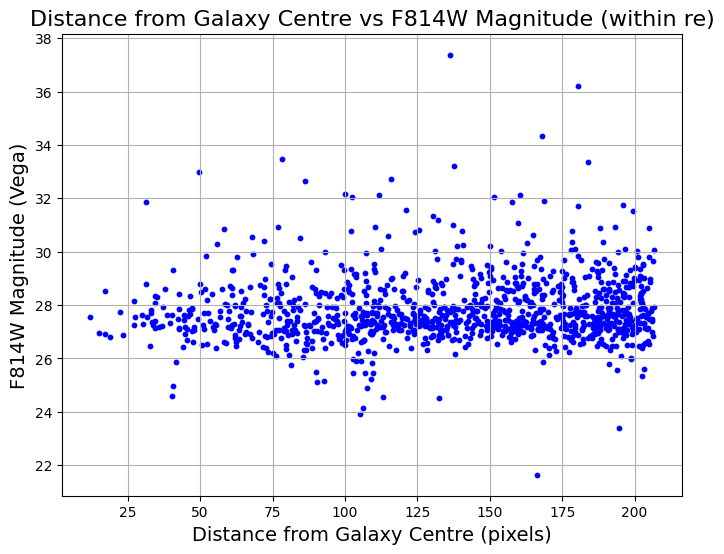

In [38]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re25, f814mag_re25, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

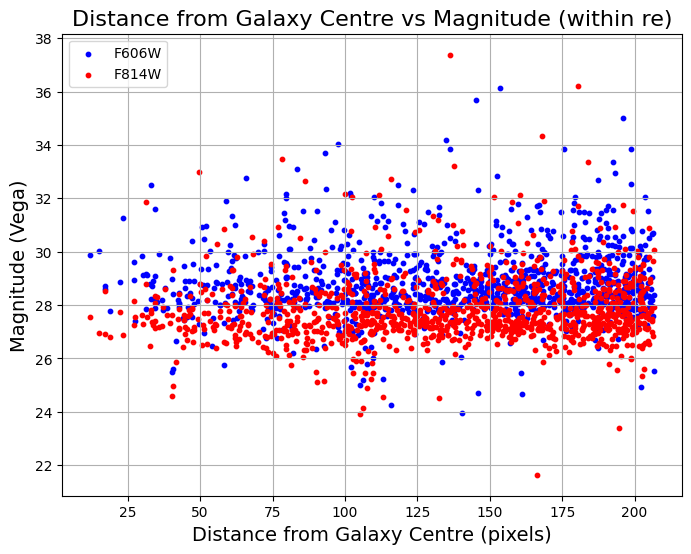

In [39]:
#plotting distance vs magnitude for both filters together within re 
plt.figure(figsize=(8,6))
plt.scatter(distgal_re25, f606mag_re25, color='blue', s=10, label='F606W')
plt.scatter(distgal_re25, f814mag_re25, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()


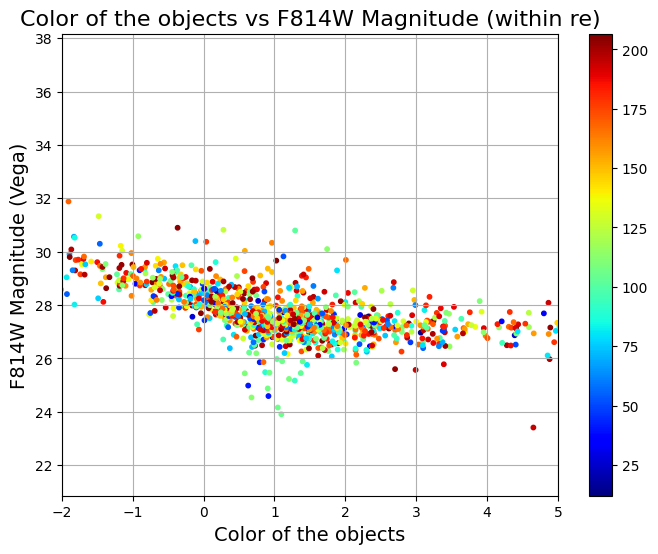

In [106]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color25, f814mag_re25, c = distgal_re25,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [126]:
#Converting into absolute Mag
distgalpc25 = 11.7 * 1e6
absmag_re25 = f814mag_re25 - 5*np.log10(distgalpc0/10)

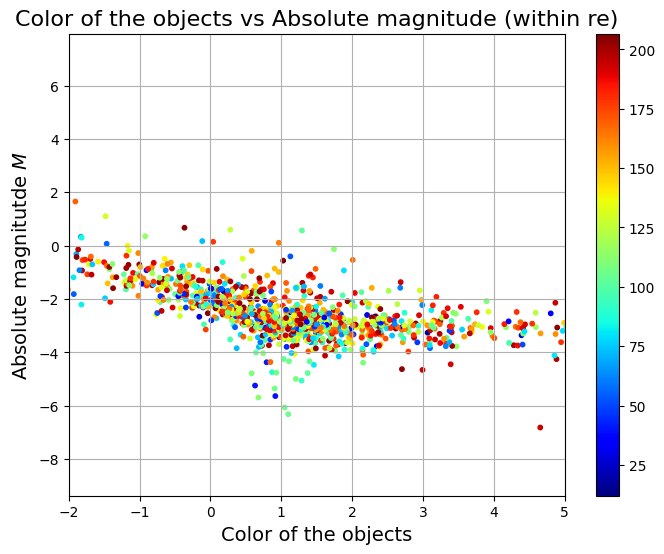

In [127]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color25, absmag_re25, c = distgal_re25,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

# Finding NSC for SMDG1257009+273155(ID = 48)

In [41]:
galcenx48 = 2220.5277730257553
galceny48 = 3410.9924579559433
cut_cat48 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/48_SMDG1257009+273155_cut_catalog.csv')

In [42]:
#converting re(arcsec) to pixels
re_arcsec48 = 5.32

hdul48 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_48_F814/MAST_2025-11-10T21_05_40.326Z/HST/j9ty55030_drc.fits')
if len(hdul48) > 1:
    hdr48 = hdul48[1].header
else:
    hdr48 = hdul48[0].header
wcs48 = WCS(hdr48)
pixel_scale_degrees48 = proj_plane_pixel_scales(wcs48)
scale_arcsec_per_pixel48 = pixel_scale_degrees48[0] * 3600
scale_pixel_per_arcsec48 = 1 / scale_arcsec_per_pixel48
re_pixels48 = re_arcsec48 * scale_pixel_per_arcsec48
print(re_pixels48)

106.4000000000032


In [43]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal48 = cut_cat48['xc'].to_numpy()
ycgal48 = cut_cat48['yc'].to_numpy()
f475mag48 = cut_cat48['F475W_mag_vega'].to_numpy()
f814mag48 = cut_cat48['F814W_mag_vega'].to_numpy()

In [44]:
#calculating the distance from the centre of the galaxy for each bright object
distgal48 = np.sqrt((xcgal48 - galcenx48)**2 + (ycgal48 - galceny48)**2)

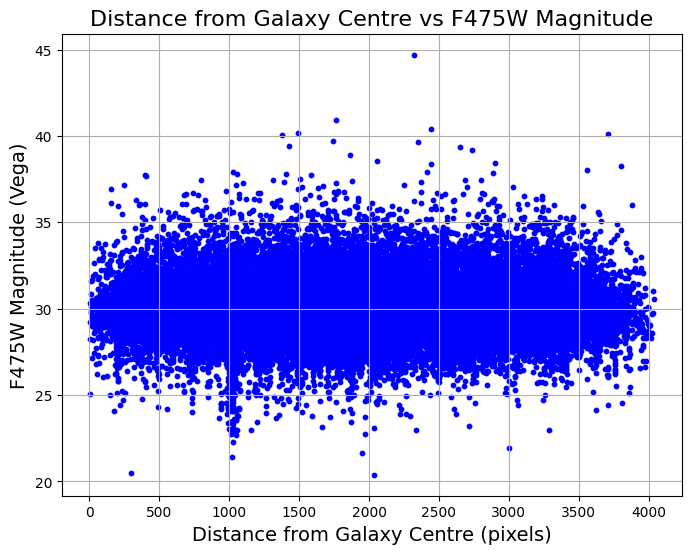

In [45]:
#plotting distance vs magnitude for f475w
plt.figure(figsize=(8,6))
plt.scatter(distgal48, f475mag48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

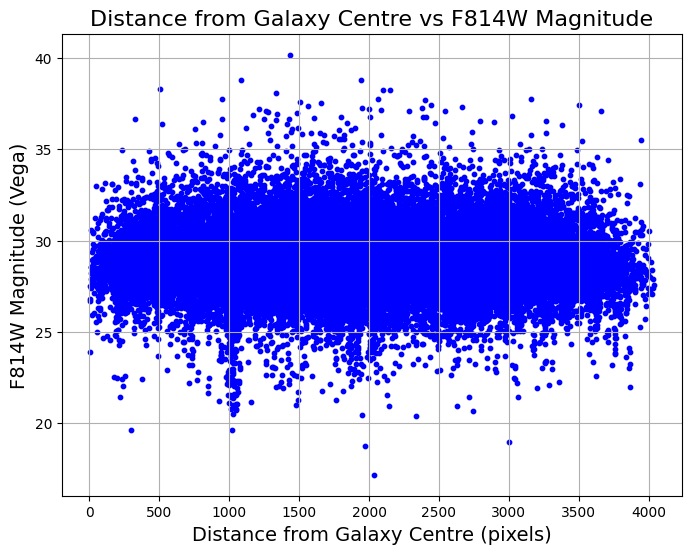

In [46]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal48, f814mag48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

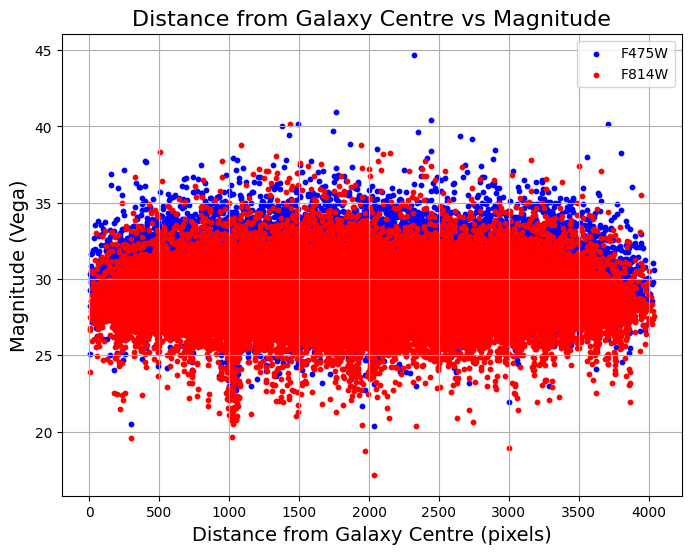

In [47]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal48, f475mag48, color='blue', s=10, label='F475W')
plt.scatter(distgal48, f814mag48, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [95]:
#refining the bright object list to only include objects within re
distgal_re48 = distgal48[distgal48 <= re_pixels48]
f475mag_re48 = f475mag48[distgal48 <= re_pixels48]
f814mag_re48 = f814mag48[distgal48 <= re_pixels48]
color48 = f475mag_re48 - f814mag_re48

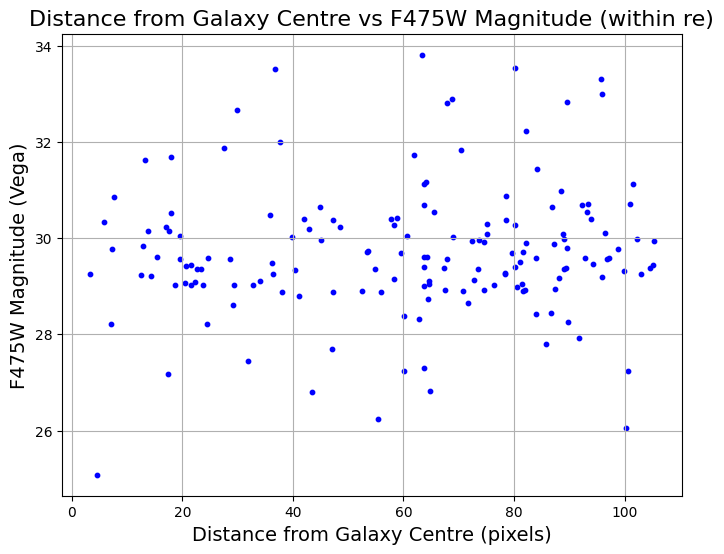

In [49]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re48, f475mag_re48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

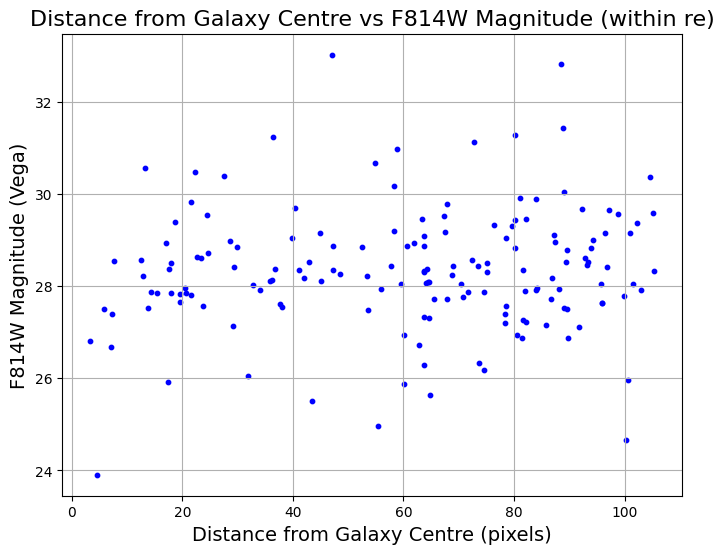

In [50]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re48, f814mag_re48, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

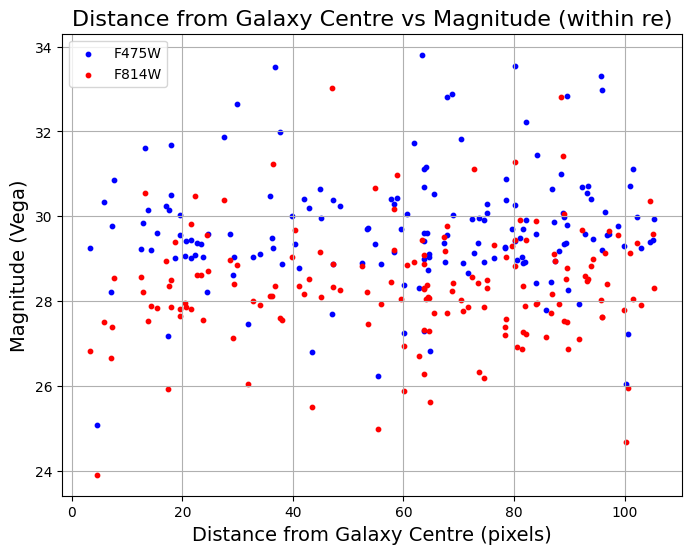

In [51]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re48, f475mag_re48, color='blue', s=10, label='F475W')
plt.scatter(distgal_re48, f814mag_re48, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

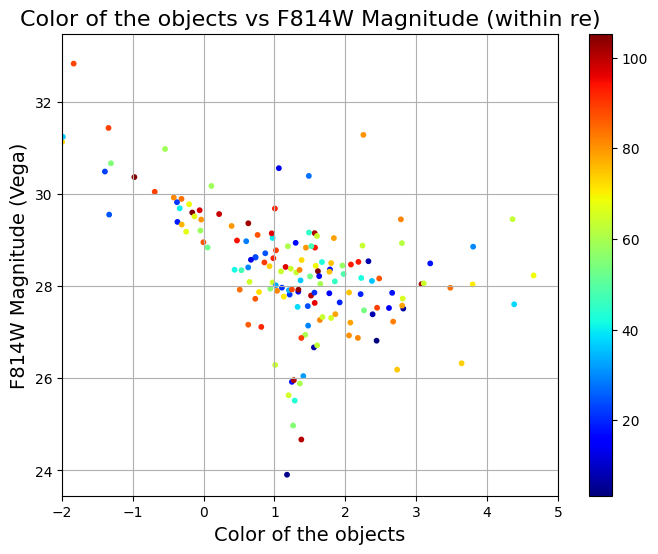

In [109]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color48, f814mag_re48, c = distgal_re48,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [131]:
#Converting into absolute Mag
distgalpc48 = 102.3 * 1e6
absmag_re48 = f814mag_re48 - 5*np.log10(distgalpc0/10)

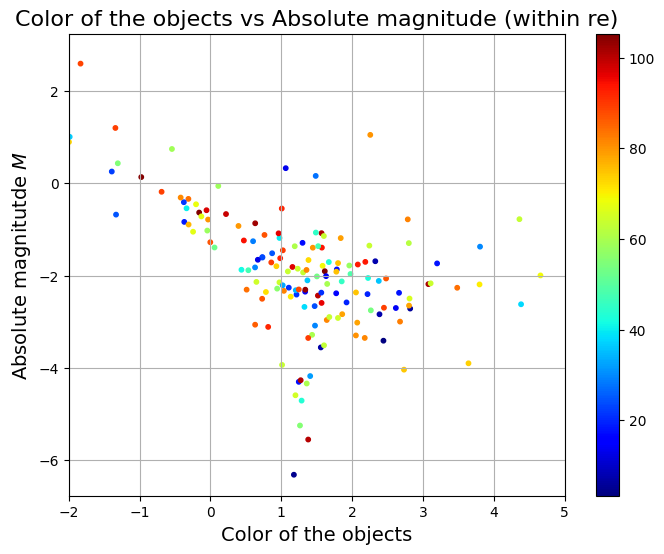

In [132]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color48, absmag_re48, c = distgal_re48,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

# Finding NSC for SMDG1301191+270315(ID = 52)

In [53]:
galcenx52 = 2176.235139120869 
galceny52 = 2555.8847524773632
cut_cat52 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/52_SMDG1301191+270315_cut_catalog.csv')

In [54]:
#converting re(arcsec) to pixels
re_arcsec52 = 5.67

hdul52 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_52_F606/MAST_2025-11-11T04_37_34.355Z/HST/jd5g04010_drc.fits')
if len(hdul52) > 1:
    hdr52 = hdul52[1].header
else:
    hdr52 = hdul52[0].header
wcs52 = WCS(hdr52)
pixel_scale_degrees52 = proj_plane_pixel_scales(wcs52)
scale_arcsec_per_pixel52 = pixel_scale_degrees52[0] * 3600
scale_pixel_per_arcsec52 = 1 / scale_arcsec_per_pixel52
re_pixels52 = re_arcsec52 * scale_pixel_per_arcsec52
print(re_pixels52)

113.40000000000066


In [55]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal52 = cut_cat52['xc'].to_numpy()
ycgal52 = cut_cat52['yc'].to_numpy()
f606mag52 = cut_cat52['F606W_mag_vega'].to_numpy()
f814mag52 = cut_cat52['F814W_mag_vega'].to_numpy()

In [56]:
#calculating the distance from the centre of the galaxy for each bright object
distgal52 = np.sqrt((xcgal52 - galcenx52)**2 + (ycgal52 - galceny52)**2)

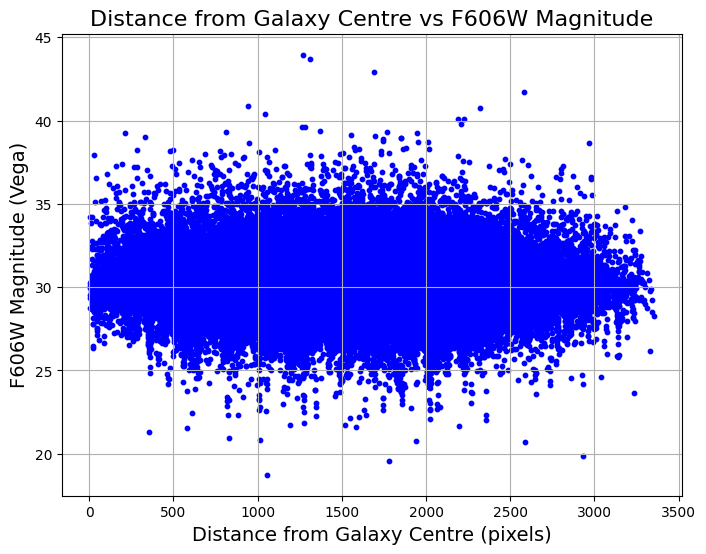

In [57]:
#plotting distance vs magnitude for f606w
plt.figure(figsize=(8,6))
plt.scatter(distgal52, f606mag52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

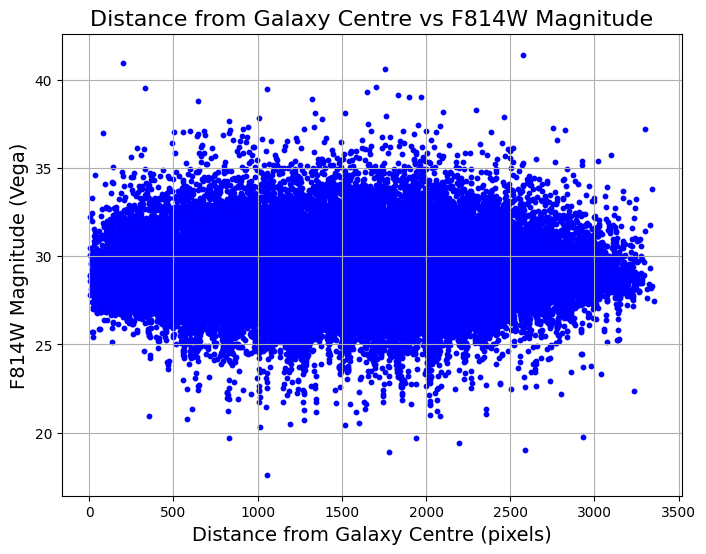

In [58]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal52, f814mag52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

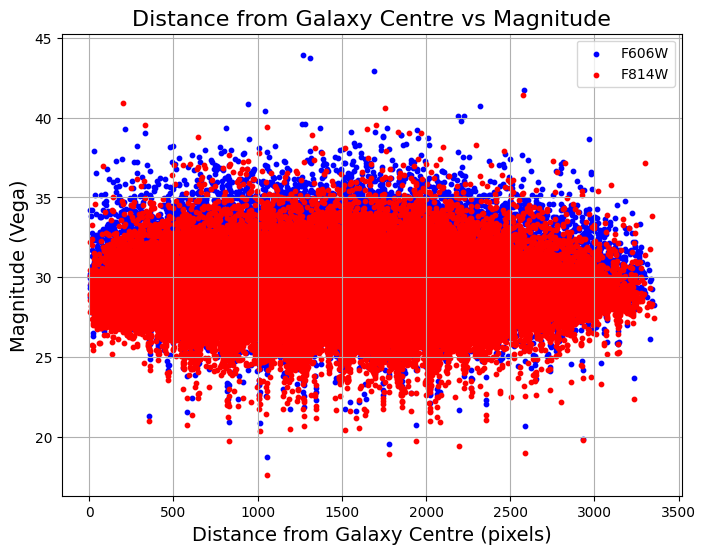

In [59]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal52, f606mag52, color='blue', s=10, label='F606W')
plt.scatter(distgal52, f814mag52, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [97]:
#refining the bright object list to only include objects within re
distgal_re52 = distgal52[distgal52 <= re_pixels52]
f606mag_re52 = f606mag52[distgal52 <= re_pixels52]
f814mag_re52 = f814mag52[distgal52 <= re_pixels52]
color52 = f606mag_re52 - f814mag_re52 

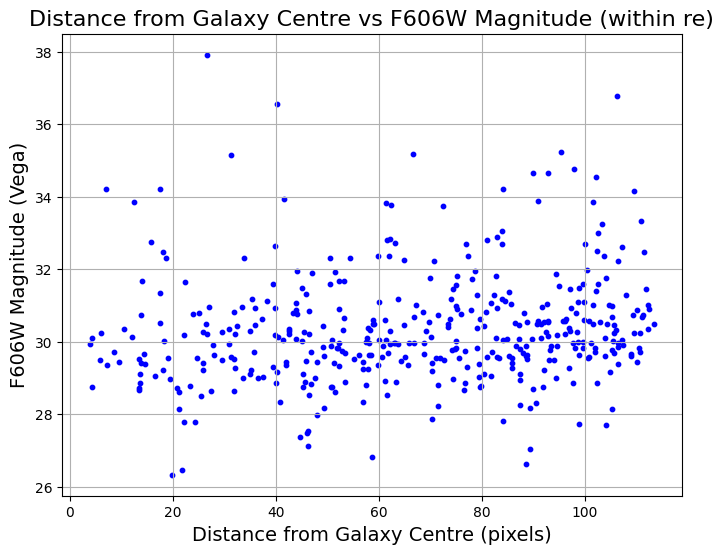

In [61]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re52, f606mag_re52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

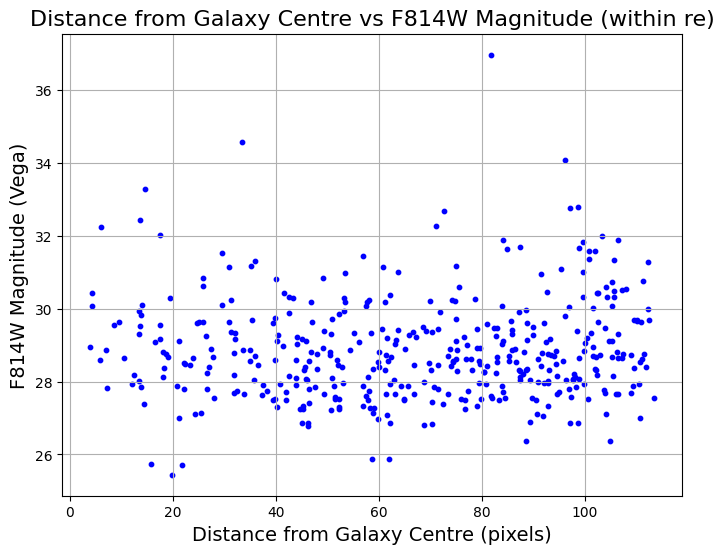

In [62]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re52, f814mag_re52, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

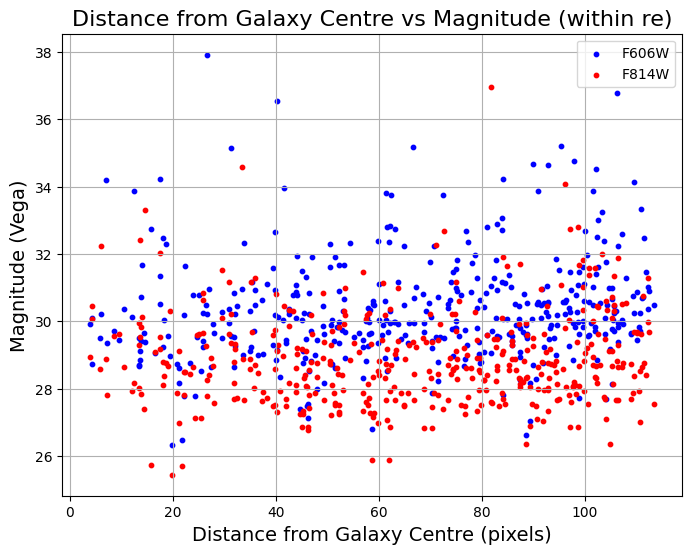

In [63]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re52, f606mag_re52, color='blue', s=10, label='F606W')
plt.scatter(distgal_re52, f814mag_re52, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

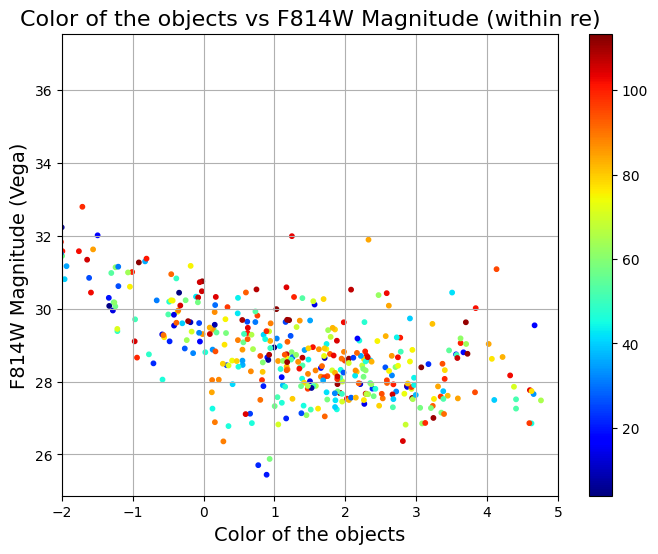

In [110]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color52, f814mag_re52, c = distgal_re52,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [134]:
#Converting into absolute Mag
distgalpc52 = 93 * 1e6
absmag_re52 = f814mag_re52 - 5*np.log10(distgalpc0/10)

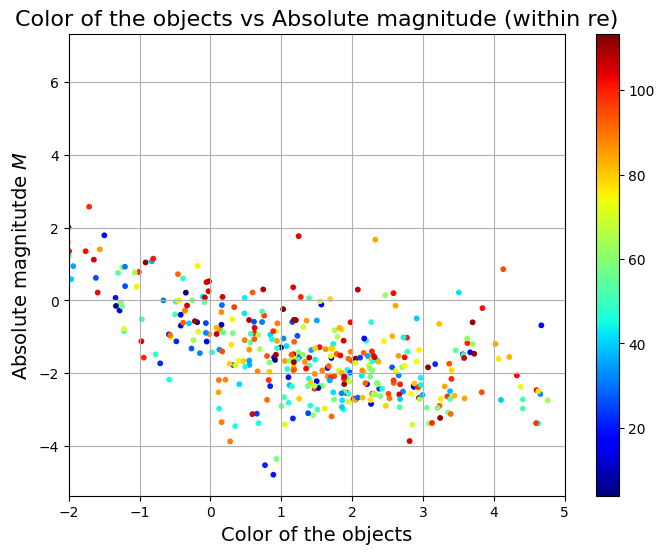

In [136]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color52, absmag_re52, c = distgal_re52,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

# Finding NSC for SMDG1411053-051319(ID = 55)

In [65]:
galcenx55 = 2180.6309804499438
galceny55 = 3161.7931840066067
cut_cat55 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/55_SMDG1411053-051319_cut_catalog.csv')


In [66]:
#converting re(arcsec) to pixels
re_arcsec55 = 18.84

hdul55 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_55_F606/MAST_2025-11-11T04_33_41.543Z/HST/jece78010_drc.fits')
if len(hdul55) > 1:
    hdr55 = hdul55[1].header
else:
    hdr55 = hdul55[0].header
wcs55 = WCS(hdr55)
pixel_scale_degrees55 = proj_plane_pixel_scales(wcs55)
scale_arcsec_per_pixel55 = pixel_scale_degrees55[0] * 3600
scale_pixel_per_arcsec55 = 1 / scale_arcsec_per_pixel55
re_pixels55 = re_arcsec55 * scale_pixel_per_arcsec55
print(re_pixels55)

376.8000000000028


In [67]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal55 = cut_cat55['xc'].to_numpy()
ycgal55 = cut_cat55['yc'].to_numpy()
f606mag55 = cut_cat55['F606W_mag_vega'].to_numpy()
f814mag55 = cut_cat55['F814W_mag_vega'].to_numpy()

In [68]:
#calculating the distance from the centre of the galaxy for each bright object
distgal55 = np.sqrt((xcgal55 - galcenx55)**2 + (ycgal55 - galceny55)**2)

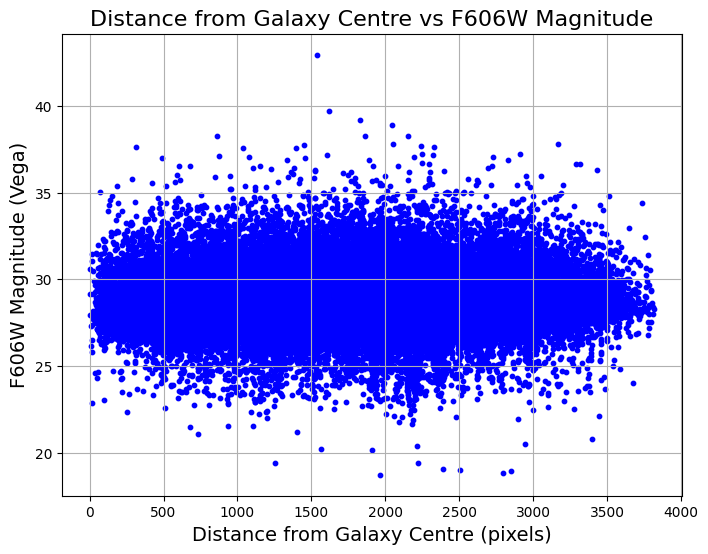

In [69]:
#plotting distance vs magnitude for f606w
plt.figure(figsize=(8,6))
plt.scatter(distgal55, f606mag55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

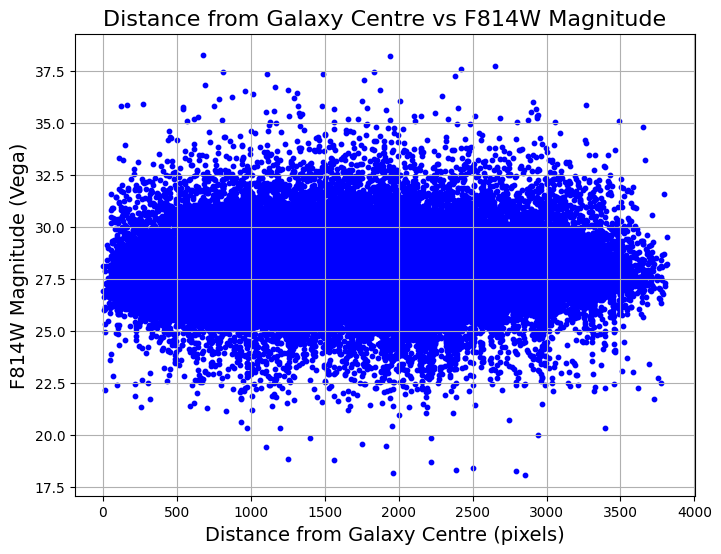

In [70]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal55, f814mag55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

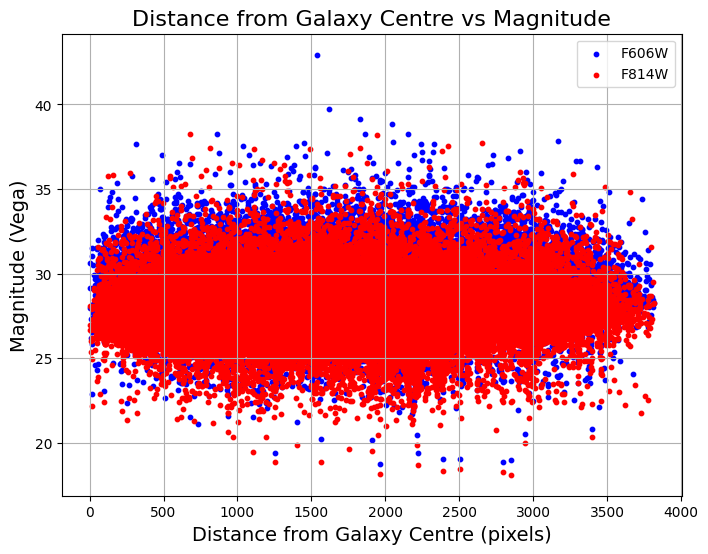

In [71]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal55, f606mag55, color='blue', s=10, label='F606W')
plt.scatter(distgal55, f814mag55, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [99]:
#refining the bright object list to only include objects within re
distgal_re55 = distgal55[distgal55 <= re_pixels55]
f606mag_re55 = f606mag55[distgal55 <= re_pixels55]
f814mag_re55 = f814mag55[distgal55 <= re_pixels55]
color55 = f606mag_re55 - f814mag_re55

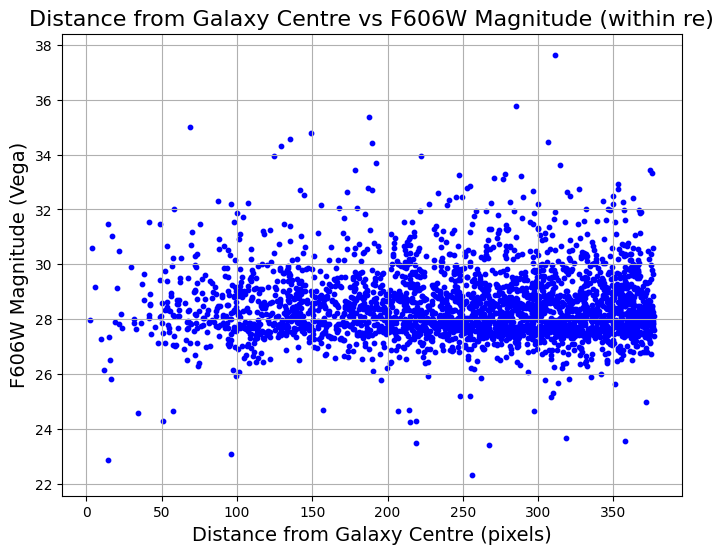

In [73]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re55, f606mag_re55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F606W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F606W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

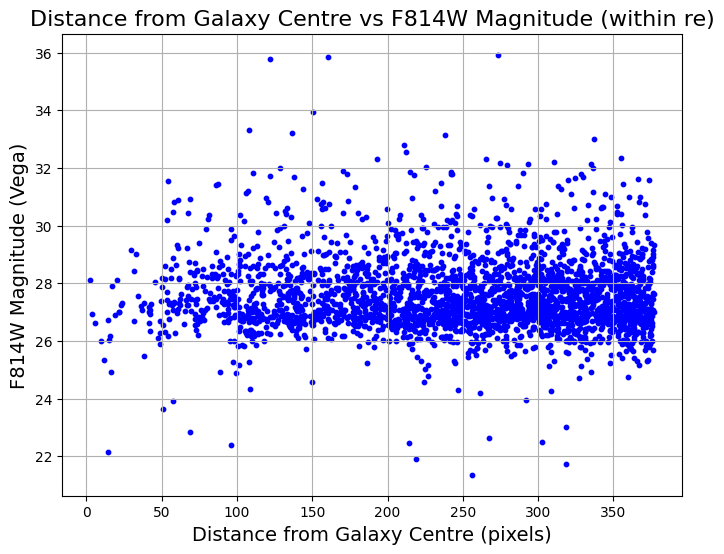

In [74]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re55, f814mag_re55, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

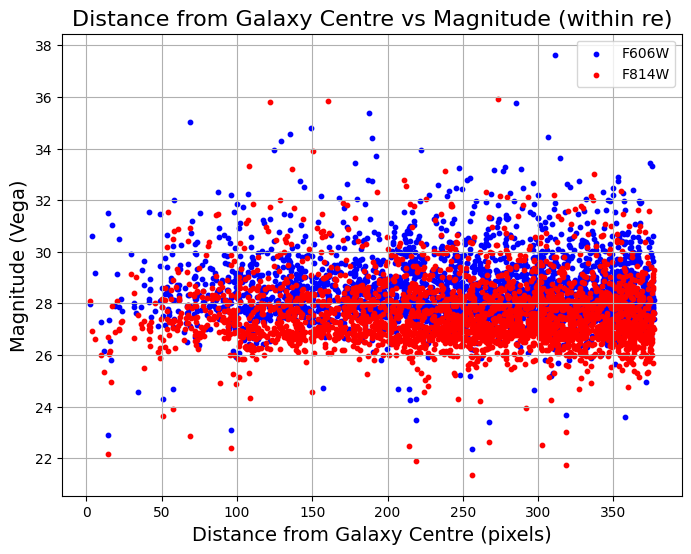

In [75]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re55, f606mag_re55, color='blue', s=10, label='F606W')
plt.scatter(distgal_re55, f814mag_re55, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

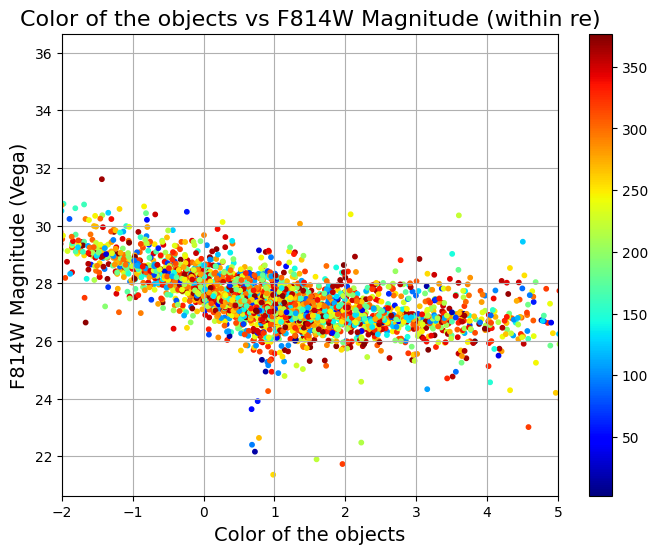

In [111]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color55, f814mag_re55, c = distgal_re55,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [138]:
#Converting into absolute Mag
distgalpc55 = 34.7 * 1e6
absmag_re55 = f814mag_re55 - 5*np.log10(distgalpc0/10)

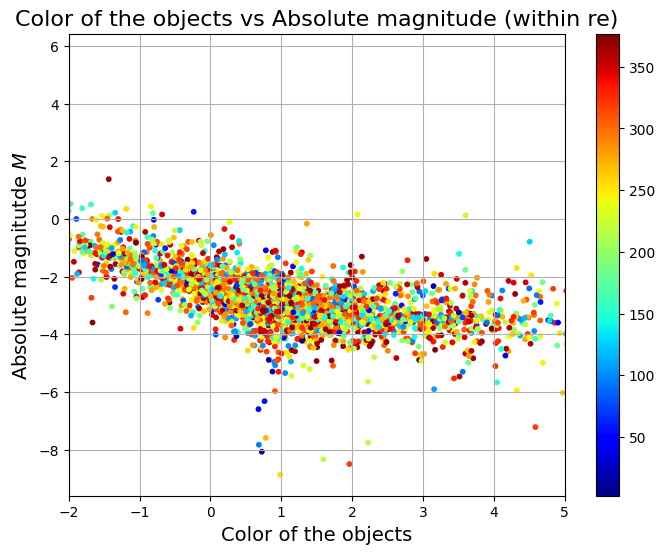

In [139]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color55, absmag_re55, c = distgal_re55,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()

# Finding NSC for SMDG1214055+070631(ID = 77)

In [77]:
galcenx77 = 3275.8978321554605
galceny77 = 1612.9255780512071
cut_cat77 = pandas.read_csv('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/77_SMDG1214055+070631_cut_catalog.csv')

In [78]:
#converting re(arcsec) to pixels
re_arcsec77 = 9.29

hdul77 = fits.open('/Users/ananthmugundhan/Documents/Research_work/Space_data/HST_cut2/ID_77_F475/MAST_2025-11-11T04_46_43.017Z/HST/jc8a05020_drc.fits')
if len(hdul77) > 1:
    hdr77 = hdul77[1].header
else:
    hdr77 = hdul77[0].header
wcs77 = WCS(hdr77)
pixel_scale_degrees77 = proj_plane_pixel_scales(wcs77)
scale_arcsec_per_pixel77 = pixel_scale_degrees77[0] * 3600
scale_pixel_per_arcsec77 = 1 / scale_arcsec_per_pixel77
re_pixels77 = re_arcsec77 * scale_pixel_per_arcsec77
print(re_pixels77)

185.80000000000965


In [79]:
#creating 2 numpy arrays that hold the xc and yc of each bright object
xcgal77 = cut_cat77['xc'].to_numpy()
ycgal77 = cut_cat77['yc'].to_numpy()
f475mag77 = cut_cat77['F475W_mag_vega'].to_numpy()
f814mag77 = cut_cat77['F814W_mag_vega'].to_numpy()

In [80]:
#calculating the distance from the centre of the galaxy for each bright object
distgal77 = np.sqrt((xcgal77 - galcenx77)**2 + (ycgal77 - galceny77)**2)

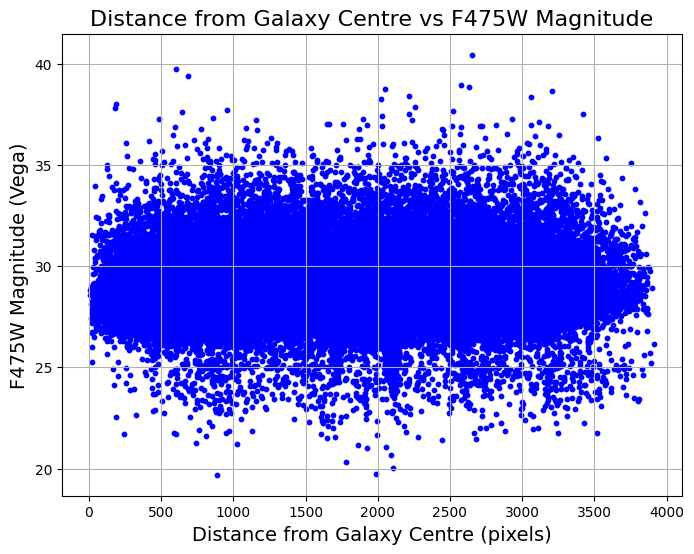

In [81]:
#plotting distance vs magnitude for f475w
plt.figure(figsize=(8,6))
plt.scatter(distgal77, f475mag77, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

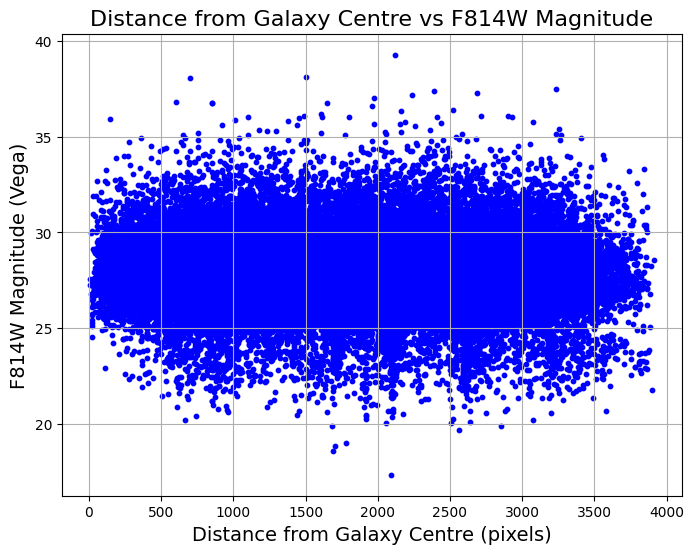

In [82]:
#plotting distance vs magnitude for f814w
plt.figure(figsize=(8,6))
plt.scatter(distgal77, f814mag77, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

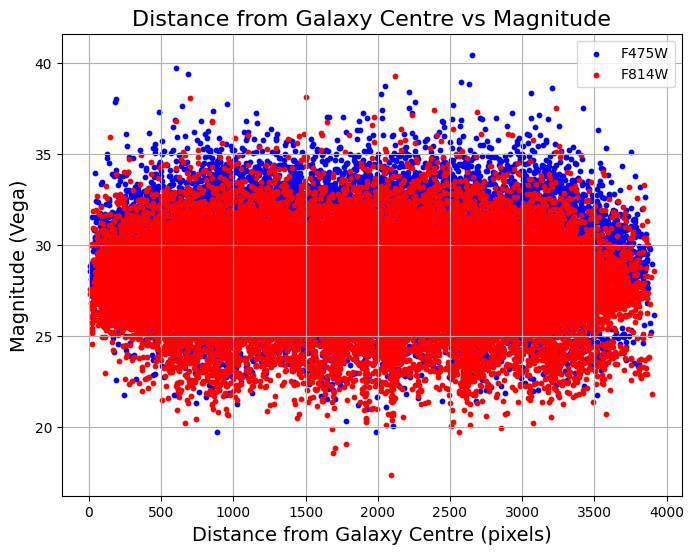

In [83]:
#plotting distance vs magnitude for both filters
plt.figure(figsize=(8,6))
plt.scatter(distgal77, f475mag77, color='blue', s=10, label='F475W')
plt.scatter(distgal77, f814mag77, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

In [101]:
#refining the bright object list to only include objects within re
distgal_re77 = distgal77[distgal77 <= re_pixels77]
f475mag_re77 = f475mag77[distgal77 <= re_pixels77]
f814mag_re77 = f814mag77[distgal77 <= re_pixels77]
color77 = f475mag_re77 - f814mag_re77

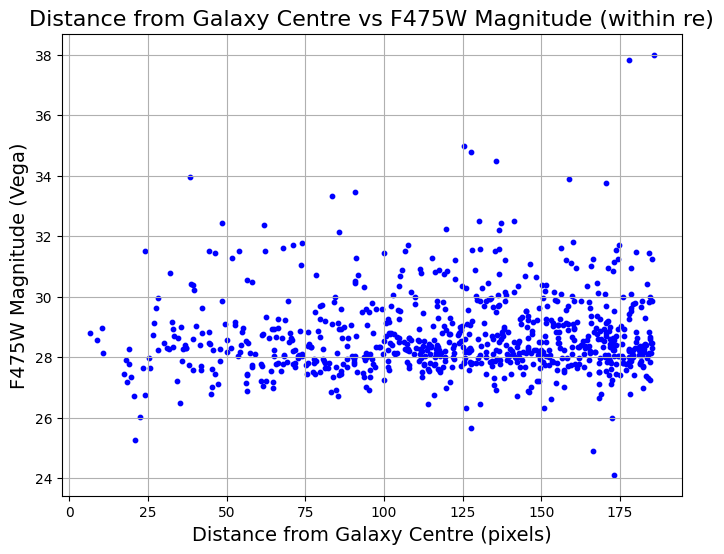

In [85]:
#plotting distance vs magnitude for f47w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re77, f475mag_re77, color='blue', s=10)
plt.title('Distance from Galaxy Centre vs F475W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('F475W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()

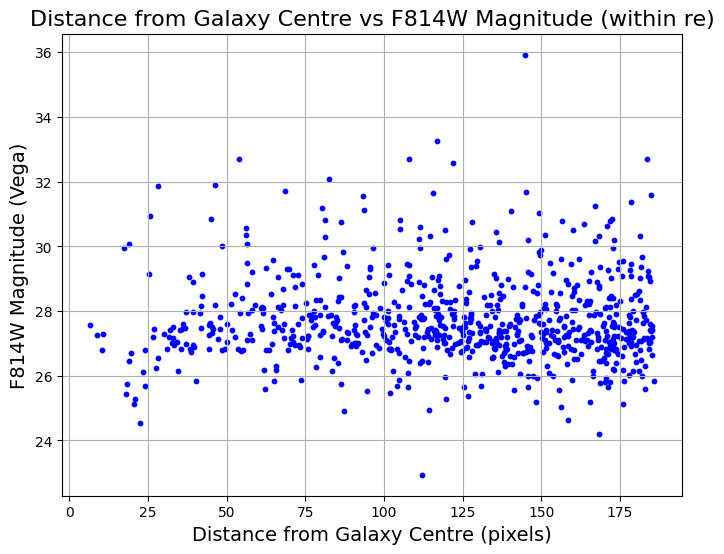

In [86]:
#plotting distance vs magnitude for f814w in re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re77, f814mag_re77, color = 'blue', s=10)
plt.title('Distance from Galaxy Centre vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.grid()
plt.show()  

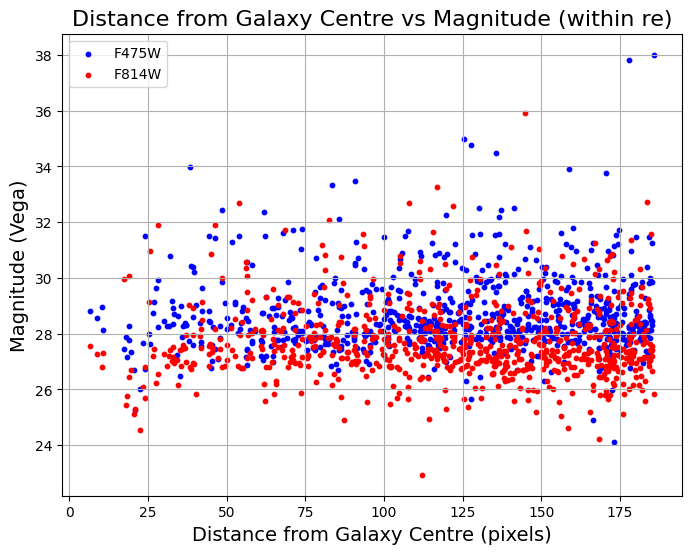

In [87]:
#plotting distance vs magnitude for both filters together within re
plt.figure(figsize=(8,6))
plt.scatter(distgal_re77, f475mag_re77, color='blue', s=10, label='F475W')
plt.scatter(distgal_re77, f814mag_re77, color='red', s=10, label='F814W')
plt.title('Distance from Galaxy Centre vs Magnitude (within re)', fontsize=16)
plt.xlabel('Distance from Galaxy Centre (pixels)', fontsize=14)
plt.ylabel('Magnitude (Vega)', fontsize=14)
plt.legend()
plt.grid()
plt.show()

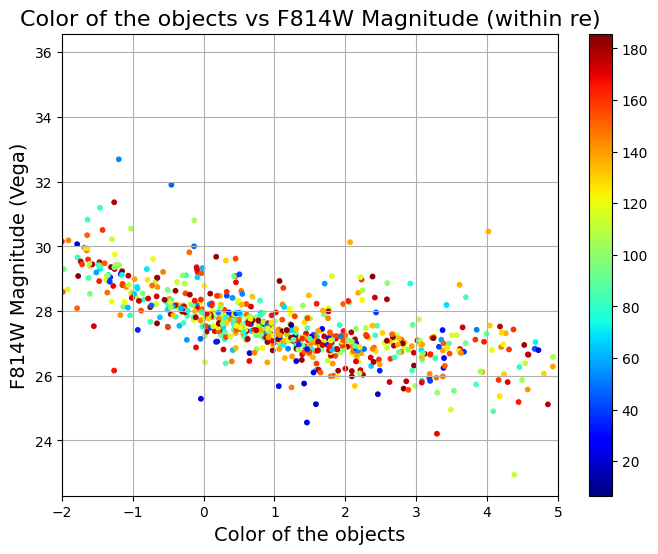

In [112]:
#plotting a color vs magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color77, f814mag_re77, c = distgal_re77,cmap = 'jet', s=10)
plt.title('Color of the objects vs F814W Magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('F814W Magnitude (Vega)', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()


In [142]:
#Converting into absolute Mag
distgalpc77 = 29.6 * 1e6
absmag_re77 = f814mag_re77 - 5*np.log10(distgalpc0/10)

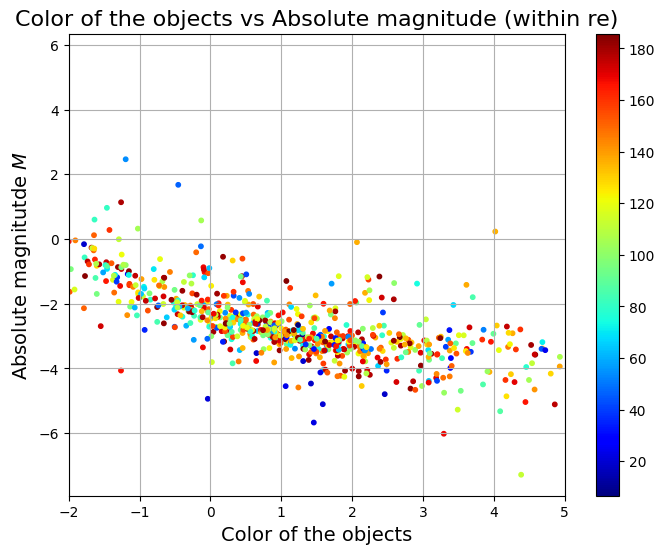

In [145]:
#plotting a color vs absolute magnitude for the objects within a re
plt.figure(figsize=(8,6))
plt.scatter(color77, absmag_re77, c = distgal_re77,cmap = 'jet', s=10)
plt.title('Color of the objects vs Absolute magnitude (within re)', fontsize=16)
plt.xlabel('Color of the objects', fontsize=14) 
plt.ylabel('Absolute magnitutde $M$', fontsize=14)
plt.xlim(-2, 5)
plt.grid()
plt.colorbar()
plt.show()